# **Modelado de Datos**

# **Introducción**
Para la sección de modelos de este proyecto, nos enfocaremos en evaluar y comparar el desempeño de distintas técnicas de aprendizaje supervisado. Tras un exhaustivo análisis exploratorio de datos, hemos preprocesado y preparado el conjunto de datos, garantizando su integridad y relevancia para el modelado. La implementación de estos modelos incluye Árboles de Decisión y k-Nearest Neighbors, tanto en sus versiones básicas como mejoradas mediante técnicas de ensamble. Cada modelo será evaluado de manera rigurosa, no solo con métricas cuantitativas como AUC y F1, sino también mediante representaciones visuales, como matrices de confusión y curvas ROC, que permiten una interpretación integral del rendimiento predictivo de cada algoritmo. Esta metodología nos permitirá identificar el modelo que mejor se ajusta a las necesidades del proyecto, maximizando la precisión y la robustez en la clasificación final.


# **Importación de librerías y modelos**

En esta fase, cargamos los modelos entrenados desde archivos en formato `.pkl` para su evaluación. Se utiliza un script que lee los nombres de los modelos desde un archivo (`model_paths.txt`) y los carga secuencialmente, proporcionando mensajes de éxito o errores específicos. Este enfoque permite gestionar y cargar automáticamente múltiples modelos para la siguiente etapa de análisis y comparación en el flujo del proyecto.

In [1]:
from models_testing import *

import os
from pickle import load, UnpicklingError

with open('C:\\Users\\sofmo\\Desktop\\EDA\\jupyterbook\\docs\\Models\\model_paths.txt', 'r') as file:
    model_filenames = file.read().splitlines()

models = []
for model_name in model_filenames:
    model_path = os.path.join('C:\\Users\\sofmo\\Desktop\\EDA\\jupyterbook\\docs\\Models', f'{model_name}.pkl')
    print(f"Attempting to load model from: {model_path}")
    if os.path.exists(model_path):
        try:
            with open(model_path, 'rb') as model_file:
                model = load(model_file)
                models.append(model)
                print(f"Successfully loaded model: {model_name}")
        except (UnpicklingError, EOFError, OSError, Exception) as e:
            print(f"Error loading {model_path}: {e}")
    else:
        print(f"File {model_path} does not exist.")


Attempting to load model from: C:\Users\sofmo\Desktop\EDA\jupyterbook\docs\Models\dt_trained.pkl
Successfully loaded model: dt_trained
Attempting to load model from: C:\Users\sofmo\Desktop\EDA\jupyterbook\docs\Models\dt_ada_trained.pkl
Successfully loaded model: dt_ada_trained
Attempting to load model from: C:\Users\sofmo\Desktop\EDA\jupyterbook\docs\Models\knn_trained.pkl
Successfully loaded model: knn_trained
Attempting to load model from: C:\Users\sofmo\Desktop\EDA\jupyterbook\docs\Models\knn_ada_trained.pkl
Successfully loaded model: knn_ada_trained


c:\Users\sofmo\miniconda3\envs\EDA\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sofmo\miniconda3\envs\EDA\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sofmo\miniconda3\envs\EDA\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using vers

In [2]:
with open('Data/data.pkl','rb') as file:
    _, _= load( file )
    X_test, y_test = load( file )
X_test, y_test = X_test.copy(), y_test.copy()

In [3]:
# Verifica si 'knn' y 'knn_ada' están en la lista de modelos
for model_info in models:
    if model_info['name'] == 'knn':
        knn = model_info
    elif model_info['name'] == 'knn_ada':
        knn_ada = model_info

In [4]:
for model_info in models:
    if model_info['name'] == 'dt':
        dt = model_info
    elif model_info['name'] == 'dt_ada':
        dt_ada = model_info

# **Modelos de Árbol de Decisión (DT)**

En esta sección, se presentan los modelos basados en Árboles de Decisión (DT), los cuales se utilizan por su simplicidad y capacidad interpretativa. Aquí se incluye tanto el modelo básico de Árbol de Decisión como la versión optimizada con AdaBoost (`dt` y `dt_ada`), que potencia el rendimiento al reducir errores en las predicciones. Cada modelo fue ajustado mediante una búsqueda de hiperparámetros y se cargaron los resultados relevantes, incluyendo el AUC y tiempo de procesamiento, para su posterior análisis y comparación. 

Los parámetros seleccionados, así como los tiempos de CPU y métricas de rendimiento, se almacenan en un DataFrame y se presentan de forma resumida. Esto permite evaluar el impacto del método de mejora AdaBoost en la precisión y robustez de los modelos. 

## **Carga de Modelos y Parámetros**
Los modelos basados en Árboles de Decisión proporcionan interpretabilidad y son efectivos para clasificaciones binarias. En esta primera etapa, cargamos dos modelos: el Árbol de Decisión base (DT) y una versión mejorada con AdaBoost (DT_Ada). A continuación, se presentan los parámetros optimizados para cada modelo, junto con la métrica AUC y el tiempo de CPU utilizado durante el ajuste.

In [5]:
dt_models = [dt, dt_ada]
dt_parameters = [
    {'Nombre': model['name']} | model['model'].best_params_ | {'AUC': model['model'].best_score_, 'Tiempo de CPU': model['cpu_time']}
    for model in dt_models
]
dt_parameters = DataFrame(dt_parameters)
display(dt_parameters)


,Nombre,classifier__criterion,classifier__max_depth,AUC,Tiempo de CPU
0,dt,entropy,8,0.788938,125.494143
1,dt_ada,gini,8,0.783710,610.739749


El modelo `dt` utiliza el criterio de entropía y alcanza un AUC de 0.7889 con un tiempo de CPU de 125.49 segundos. Por otro lado, `dt_ada` usa el criterio Gini, alcanzando un AUC de 0.7837, pero con un tiempo de CPU significativamente mayor de 610.74 segundos. Esto sugiere que el modelo básico es más eficiente computacionalmente que su contraparte adaptativa.

## **Evaluación de los Modelos**

Para obtener una visión más profunda de su desempeño, calculamos las métricas de precisión, recall, F1 y AUC de cada modelo de Árbol de Decisión. Estas métricas nos ayudarán a entender el rendimiento de cada modelo en términos de precisión y capacidad predictiva.

In [6]:
dt_metrics = [evaluate_model(model['model'], X_test, y_test) for model in dt_models]
dt_metrics_df = DataFrame(dt_metrics, index=[model['name'] for model in dt_models])
display(dt_metrics_df)

,Precision,Recall,F1,AUC
dt,0.903656,0.820227,0.859923,0.792020
dt_ada,0.899353,0.835401,0.866198,0.789145


En la tabla se presentan las métricas de rendimiento de dos modelos de Árbol de Decisión: el modelo estándar (DT) y el modelo mejorado con AdaBoost (DT_Ada). Ambos modelos muestran resultados similares, pero el DT_Ada destaca con una mejor combinación de precisión y recall, reflejada en un puntaje F1 ligeramente superior (0.8662 frente a 0.8599). Sin embargo, el modelo DT presenta un AUC ligeramente más alto (0.7920), lo que sugiere un mejor equilibrio en la discriminación general. Esto indica que DT_Ada logra un mejor balance entre clasificación correcta y recuperación de casos positivos.

## **Visualización: Matriz de Confusión y Curva ROC**
Para cada modelo k-NN, generamos matrices de confusión y curvas ROC. Estas visualizaciones ofrecen una visión detallada del rendimiento de los modelos y su efectividad en la clasificación de las observaciones.

### **Evaluación del modelo de Árbol de Decisión (DT)**

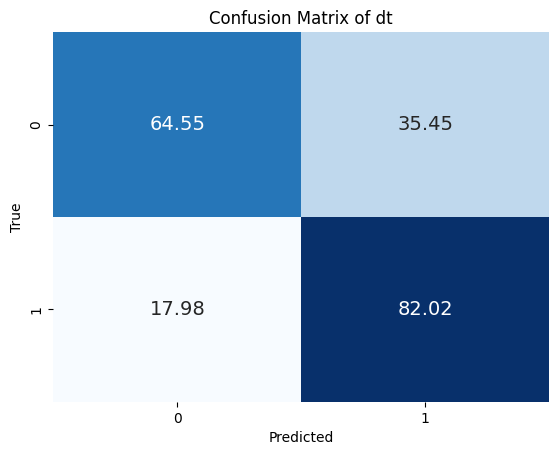

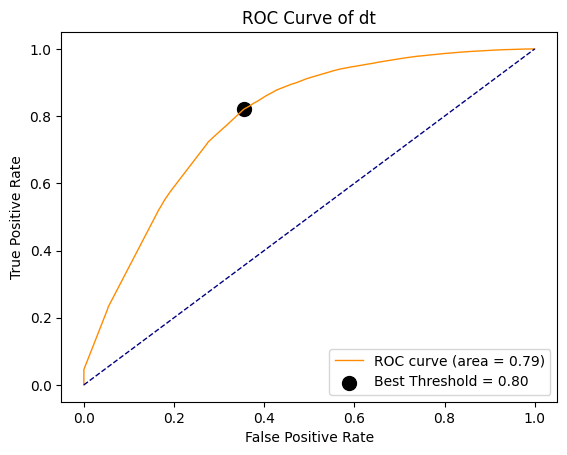

In [7]:
plot_confusion_matrix(dt['model'], X_test, y_test, dt['name'])
plot_roc_curve(dt['model'], X_test, y_test, dt['name'])

La matriz de confusión del modelo de Árbol de Decisión (DT) indica una alta precisión en la predicción de la clase positiva (82.02%) y una moderada en la clase negativa (64.55%), aunque muestra un margen de error que sugiere posibles mejoras en la precisión de la clase negativa. La curva ROC, con un AUC de 0.79, señala un rendimiento razonable en la discriminación de clases, y su umbral óptimo de 0.80 ofrece un equilibrio adecuado entre la sensibilidad y la especificidad del modelo, sugiriendo un rendimiento sólido en general.

### **Evaluación del modelo de Árbol de Decisión con AdaBoost (DT_AdaBoost)**

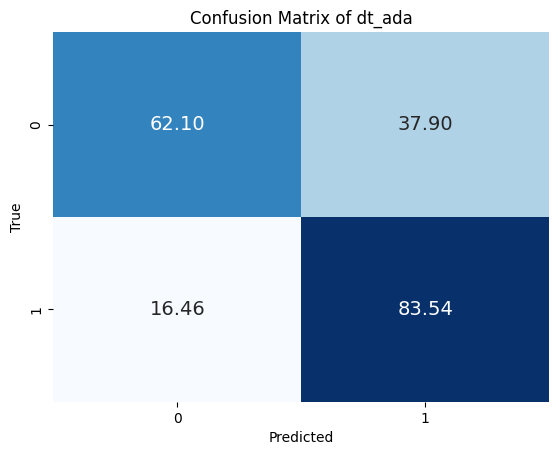

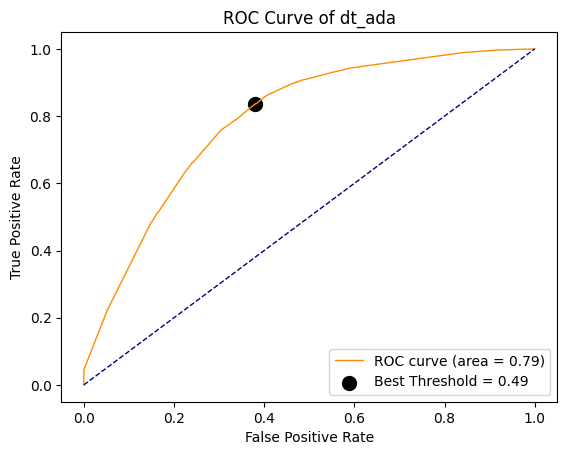

In [8]:
plot_confusion_matrix(dt_ada['model'], X_test, y_test, dt_ada['name'])
plot_roc_curve(dt_ada['model'], X_test, y_test, dt_ada['name'])

La matriz de confusión del modelo `dt_ada` muestra que el modelo tiene una precisión aceptable al clasificar tanto positivos como negativos, con un 83.54% de los verdaderos positivos y un 62.10% de los verdaderos negativos clasificados correctamente. Sin embargo, también se observan falsos positivos (37.90%) y falsos negativos (16.46%). La curva ROC para `dt_ada` indica una buena capacidad de discriminación, con un AUC de 0.79. El umbral óptimo, marcado en la gráfica, maximiza el equilibrio entre sensibilidad y especificidad.

## **Modelos k-Nearest Neighbors ($k$-NN)**

### **Carga de Modelos y Parámetros**
La técnica k-Nearest Neighbors se basa en la proximidad de observaciones. Aquí, evaluamos dos variantes: el modelo base k-NN y su versión optimizada mediante AdaBoost (k-NN_Ada). La tabla de parámetros ofrece un resumen de las configuraciones óptimas junto con las métricas de AUC y tiempos de CPU.

In [9]:
knn_models = [knn, knn_ada]
knn_parameters = [
    {'Nombre': model['name']} | model['model'].best_params_ | {'AUC': model['model'].best_score_, 'Tiempo de CPU': model['cpu_time']}
    for model in knn_models
]
knn_parameters = DataFrame(knn_parameters)
display(knn_parameters)

,Nombre,classifier__n_neighbors,classifier__weights,AUC,Tiempo de CPU
0,knn,183,uniform,0.793077,994.656473
1,knn_ada,231,uniform,0.784849,2533.746077


En esta tabla se presentan los resultados de los modelos K-Nearest Neighbors (KNN) y KNN con AdaBoost (KNN_Ada). El modelo KNN básico utiliza 183 vecinos y tiene un AUC de 0.793077, con un tiempo de CPU de aproximadamente 994.66 segundos. Por otro lado, el modelo KNN_Ada, optimizado con AdaBoost, incrementa el número de vecinos a 231 y muestra un AUC ligeramente inferior de 0.784849, aunque el tiempo de CPU aumenta significativamente a 2533.75 segundos. Esto sugiere que la incorporación de AdaBoost aumenta la complejidad y el tiempo de procesamiento sin mejorar el rendimiento del modelo en términos de AUC.

### **Evaluación de los Modelos**
Evaluamos cada modelo k-NN utilizando las métricas de precisión, recall, F1 y AUC. La tabla resultante nos ayuda a comparar el rendimiento de los modelos k-NN con los modelos de Árbol de Decisión, permitiendo determinar cuál es más adecuado para el conjunto de datos.

In [10]:
knn_metrics = [evaluate_model(model['model'], X_test, y_test) for model in knn_models]
knn_metrics_df = DataFrame(knn_metrics, index=[model['name'] for model in knn_models])
display(knn_metrics_df)

,Precision,Recall,F1,AUC
knn,0.903972,0.823346,0.861777,0.793589
knn_ada,0.903871,0.800584,0.849098,0.784010


El modelo knn alcanzó un AUC de 0.793 con un tiempo de CPU de aproximadamente 995 segundos, mientras que knn_ada obtuvo un AUC ligeramente inferior (0.785) pero con un tiempo de CPU considerablemente mayor (2534 segundos). Aunque la optimización del modelo knn_ada no mejora el AUC y requiere significativamente más tiempo de procesamiento, sigue siendo comparable al modelo original en cuanto a rendimiento.

### **Visualización: Matriz de Confusión y Curva ROC**
Para cada modelo k-NN, generamos matrices de confusión y curvas ROC. Estas visualizaciones ofrecen una visión detallada del rendimiento de los modelos y su efectividad en la clasificación de las observaciones.

### **Evaluación del modelo $k$-NN**

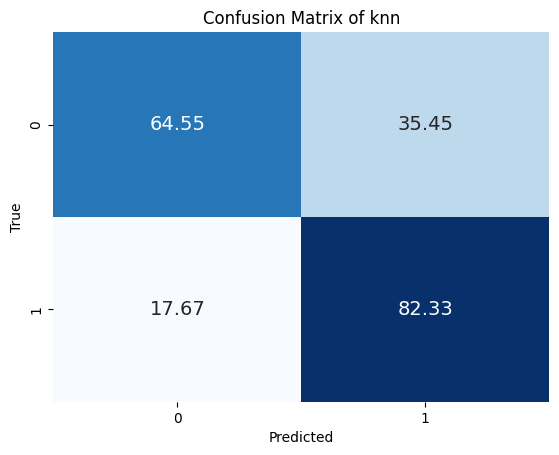

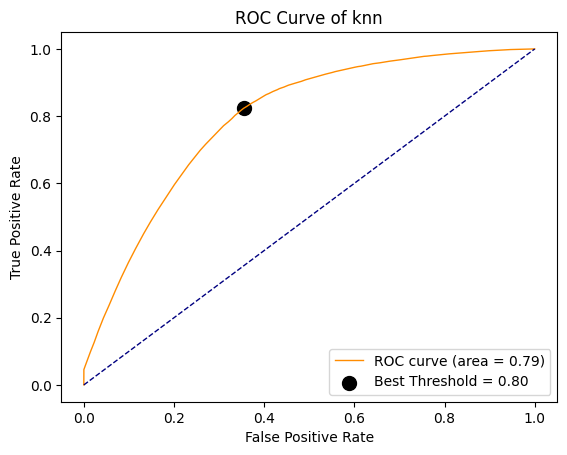

In [11]:
plot_confusion_matrix(knn['model'], X_test, y_test, knn['name'])
plot_roc_curve(knn['model'], X_test, y_test, knn['name'])

La matriz de confusión para el modelo KNN muestra una buena precisión en la clasificación de ambas clases. El modelo logra identificar correctamente el 64.55% de los casos negativos y el 82.33% de los casos positivos, aunque presenta errores en ambas clases: 35.45% de falsos positivos y 17.67% de falsos negativos. La curva ROC, con un área bajo la curva (AUC) de 0.79, indica un buen rendimiento general del modelo, y el umbral óptimo seleccionado (0.80) equilibra de manera eficiente las tasas de verdaderos positivos y falsos positivos.

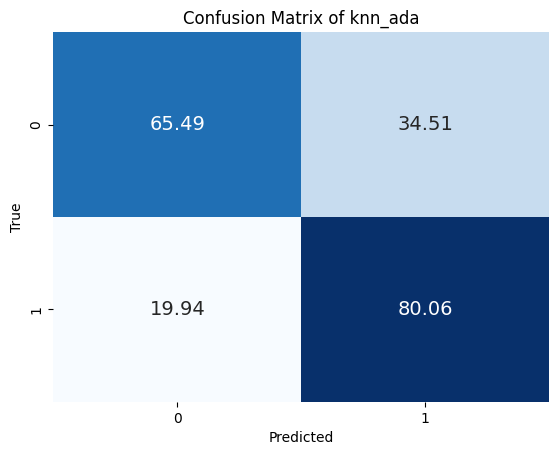

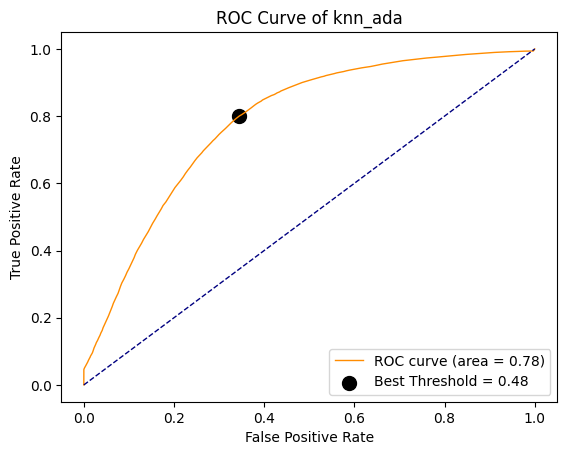

In [12]:
plot_confusion_matrix(knn_ada['model'], X_test, y_test, knn_ada['name'])
plot_roc_curve(knn_ada['model'], X_test, y_test, knn_ada['name'])

Para el modelo K-Nearest Neighbors ajustado con AdaBoost (`knn_ada`), la matriz de confusión muestra una precisión moderada, con un 65.49% de verdaderos negativos y un 80.06% de verdaderos positivos. Sin embargo, la tasa de falsos negativos (19.94%) y falsos positivos (34.51%) es notable, lo cual sugiere áreas de mejora en la discriminación entre clases. En la curva ROC, el área bajo la curva (AUC) es de 0.78, indicando una capacidad de clasificación aceptable. El umbral óptimo se sitúa en 0.48, destacándose en la curva como el punto de mejor equilibrio entre sensibilidad y especificidad.

## **Comparación Final de Modelos y Evaluación General**
En esta sección de comparación, consolidamos los resultados de ambos tipos de modelos (DT y k-NN). La tabla comparativa de métricas ayuda a identificar el modelo óptimo y proporciona una visión clara del rendimiento general de los modelos.

### **Tabla comparativa**


In [13]:
AllMetrics = dt_metrics + knn_metrics
ComparisonDf = DataFrame(AllMetrics, index=[model['name'] for model in dt_models + knn_models])
display(ComparisonDf)

,Precision,Recall,F1,AUC
dt,0.903656,0.820227,0.859923,0.792020
dt_ada,0.899353,0.835401,0.866198,0.789145
knn,0.903972,0.823346,0.861777,0.793589
knn_ada,0.903871,0.800584,0.849098,0.784010


La tabla comparativa de métricas muestra el desempeño de cuatro modelos (DT, DT con AdaBoost, KNN y KNN con AdaBoost) en términos de Precisión, Recall, F1 y AUC. El modelo de KNN estándar obtuvo la mayor puntuación en F1 (0.8618) y AUC (0.7936), destacándose como el modelo con mejor equilibrio entre precisión y sensibilidad. En cambio, el modelo DT estándar mostró un valor de Recall significativo (0.8202), lo que indica su capacidad para capturar correctamente las clases positivas. Aunque los modelos ajustados con AdaBoost mejoran levemente el Recall, no superan en general al KNN estándar en F1 y AUC, sugiriendo que este último logra un mejor balance general en las métricas de clasificación.

### **Visualización Resumida de Predicciones**
Como visualización final, se muestra un gráfico resumido que representa la capacidad de cada modelo para clasificar correctamente las observaciones. Esto proporciona una visión integral de la efectividad y la precisión de los modelos en su conjunto.

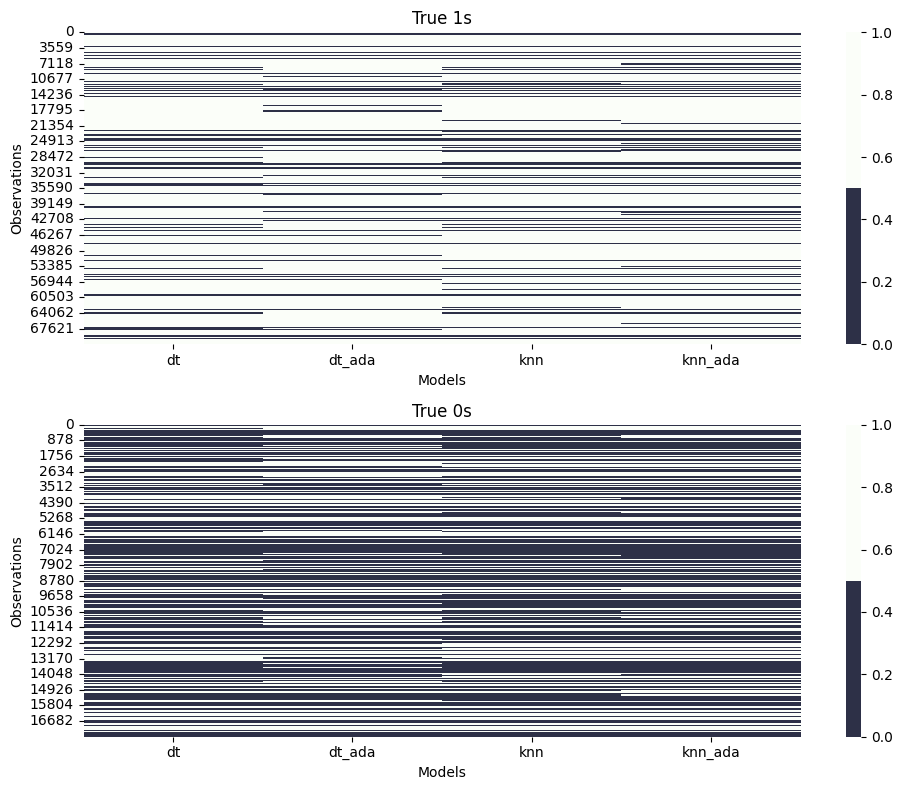

In [14]:
plot_predictions([model['model'] for model in dt_models + knn_models], X_test, y_test, [model['name'] for model in dt_models + knn_models])

En el gráfico se muestran las predicciones de los modelos para las clases de observaciones "True 1s" y "True 0s". En la parte superior, se observa la predicción de los modelos sobre las observaciones que realmente son "1". A pesar de algunas diferencias, los modelos muestran consistencia en la mayoría de las observaciones, aunque algunos modelos predicen incorrectamente ciertos casos. En la parte inferior, para las observaciones "True 0s", se evidencia un comportamiento similar. Esta visualización permite identificar patrones en los aciertos y errores de cada modelo, facilitando un análisis más detallado de su desempeño.

# **Conclusión**

En conclusión, el análisis de los modelos de Árbol de Decisión y K-Nearest Neighbors (KNN) ofrece una visión clara de su rendimiento y precisión en la clasificación de los datos. Los modelos de Árbol de Decisión, tanto el modelo base como el que utiliza AdaBoost, muestran un equilibrio entre precisión y eficiencia en el uso de recursos. Sin embargo, los modelos KNN destacan por su capacidad para capturar la complejidad de los datos a expensas de tiempos de CPU más altos. En términos de métricas, todos los modelos lograron AUC cercanos, indicando buena discriminación en la clasificación. La visualización de predicciones demuestra que los modelos son consistentes, aunque algunos patrones de error revelan áreas para mejorar la precisión. 

En general, la selección del modelo dependerá del equilibrio deseado entre precisión y eficiencia computacional, destacando el Árbol de Decisión como opción para una ejecución más rápida y KNN cuando se busca capturar mayor detalle en las predicciones.